### Mount/Unmount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
drive.flush_and_unmount()

In [0]:
drive.mount("/content/drive", force_remount=True)

### Install/import packages and libraries

In [0]:
import numpy as np
import pandas as pd
import random
import os
import cv2 
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, average_precision_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

import argparse
import re
import time
import urllib.request as lib

import tensorflow as tf
from tensorflow import keras

In [3]:
# Uncomment your directory structure // Comment others

#dir='/content/drive/My Drive/Sport_Images/Sport_Images/table_tennis/'
dir='/content/drive/My Drive/Colab Notebooks/Project1/train/tabletennis/'
image='image.jpeg'
filename = dir+image
filename

'/content/drive/My Drive/Colab Notebooks/Project1/train/tabletennis/image.jpeg'

In [0]:
# Where to save the figures
PROJECT_ROOT_DIR = "/content/drive/My Drive/Colab Notebooks/Project1/"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "results")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [0]:
def process_image(img, desired_size = 128):
    height,width,ch = img.shape
    ratio = desired_size/height
    width = int(width*ratio) if (width*ratio)<300 else 300
    height =  int(desired_size)
    dimensions = (width,height)
    image = cv2.resize(img,dimensions,interpolation=cv2.INTER_AREA)    
    # Pad bottom with zeros to desired size otherwise crop to desired size
    delta_w = (desired_size - width) if (desired_size - width) > 0 else 0
    left, right = 0, delta_w
    top, bottom = 0, 0
    color = [0, 0, 0]
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    dimensions = (desired_size, desired_size)
    image = cv2.resize(img,dimensions,interpolation=cv2.INTER_AREA)
    return image

#Display an RGB image in the proper size
def show_image(file,size=128):
    img = cv2.imread(file)
    image = process_image(img,size)
    #CV2 reads an image in BGR format. We need to convert it to RGB
    b,g,r = cv2.split(image)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
    return

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read it into OpenCV format
	resp = lib.urlopen(url)
	img = np.asarray(bytearray(resp.read()), dtype="uint8")
	img = cv2.imdecode(img,cv2.IMREAD_COLOR)
 
  # Fix width to 300, keep aspect ration and adjust height
	desired_size = 300
	image = process_image(img,desired_size)
	return image

#Show a list of keys 
def getList(dict): 
    return dict.keys()

In [0]:
# Geron - Hands-On Machine Learning with Scikit-Learn, Keras & Tension Flow
def plot_learning_curves1(model, X_train,X_val, y_train, y_val ):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    return train_errors,val_errors

def eval(y, y_pred):
    acc = accuracy_score(y, y_pred)
    pre = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print('F1 Score: ', '{:.2f}'.format(f1),'\tAccuracy: ', '{:.2f}'.format(acc),
          '\tPrecison: ','{:.2f}'.format(pre),'\tRecall: ', '{:.2f}'.format(rec))
    return   

### Change Working Directory

In [7]:
# Collab: /content/drive/My Drive/Colab Notebooks/Project1
# Check current working directory.
retval = os.getcwd()
print("Current working directory %s" % retval)
path = input()

# Now change the directory
os.chdir( path )

# Check current working directory.
retval = os.getcwd()

print("Directory changed successfully %s" % retval)

Current working directory /content
/content/drive/My Drive/Colab Notebooks/Project1
Directory changed successfully /content/drive/My Drive/Colab Notebooks/Project1


### Load images from Google-Drive

In [0]:
directory = '/content/drive/My Drive/Colab Notebooks/Project1/train/'
train_list=[]
idx, idx_y= 0, 0
y=np.zeros(963)
for path, dirs, files in os.walk(directory):
    for file in files:
      img = path +'/' + file
      img_rd = cv2.imread(img)
      image = process_image(img_rd,300)
      train_list.append(image)
      if path == '/content/drive/My Drive/Colab Notebooks/Project1/train/tabletennis':
        y[idx] = 1
#        print(idx, path +'/' + file)
      idx += 1
idx_y = idx        

In [0]:
directory = '/content/drive/My Drive/Colab Notebooks/Project1/valid/'
valid_list=[]
for path, dirs, files in os.walk(directory):
    for file in files:
      img = path +'/' + file
      img_rd = cv2.imread(img)
      image = process_image(img_rd,300)
      valid_list.append(image)
      if path == '/content/drive/My Drive/Colab Notebooks/Project1/valid/tabletennis':
        y[idx_y] = 1
#        print(idx_y, path +'/' + file)
      idx_y += 1

In [0]:
img_list = train_list + valid_list
X = np.array(img_list)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, )
print('X_train: ',X_train.shape, '\ty_train: ', y_train.shape, 'X_test: ',X_test.shape, '\ty_train: ',y_test.shape)

X_train:  (770, 300, 300, 3) 	y_train:  (770,) X_test:  (193, 300, 300, 3) 	y_train:  (193,)


## Classification Models

In [12]:
X_train = X_train.reshape(770,270000)
X_test = X_test.reshape(193,270000)
print('X_train: ',X_train.shape, '\ty_train: ', y_train.shape, '\tX_test: ',X_test.shape, '\ty_test: ',y_test.shape)

X_train:  (770, 270000) 	y_train:  (770,) 	X_test:  (193, 270000) 	y_test:  (193,)


### SDG Classifier

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(alpha=0.1,max_iter= 1000, tol=1e-03,validation_fraction=0.4, random_state=21)
sgd_clf.fit(X_train, y_train)

y_pred = sgd_clf.predict(X_test)
eval(y_test, y_pred)

F1 Score:  0.73 	Accuracy:  0.91 	Precison:  0.66 	Recall:  0.82


In [14]:
confusion_matrix(y_test, y_pred)

array([[153,  12],
       [  5,  23]])

Text(0.5, 1.0, 'SDG Precision-Recall curve: AP=0.70')

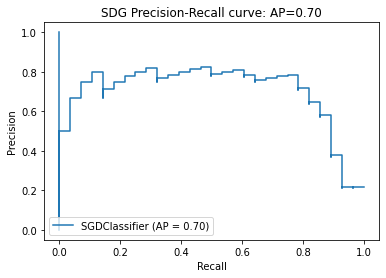

In [15]:
# Display Precision-Recall Curve
y_score = sgd_clf.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(sgd_clf, X_test, y_test)
disp.ax_.set_title('SDG Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
#save_fig("SDG-Precsion-Recall-Curve")

### Single Perceptron Classifier

In [16]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=21)
per_clf.fit(X_train, y_train)

y_pred = per_clf.predict(X_test)
eval(y_test, y_pred)

F1 Score:  0.73 	Accuracy:  0.91 	Precison:  0.66 	Recall:  0.82


In [17]:
confusion_matrix(y_test, y_pred)

array([[153,  12],
       [  5,  23]])

Text(0.5, 1.0, 'Perceptron Precision-Recall curve: AP=0.70')

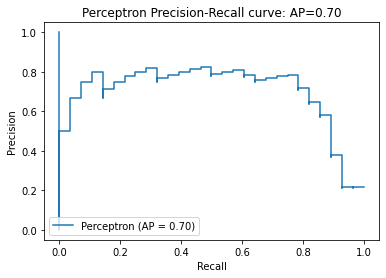

In [18]:
# Display Precision-Recall Curve
y_score = per_clf.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(per_clf, X_test, y_test)
disp.ax_.set_title('Perceptron Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
#save_fig("Perceptron-Precsion-Recall-Curve")

### Multi-Perceptron Classifier

In [19]:
from sklearn.neural_network import MLPClassifier

#Default settings create 1 hidden layer with 600 neurons
mlp_clf = MLPClassifier(hidden_layer_sizes=(300,))
mlp_clf.fit(X_train, y_train)

y_pred = mlp_clf.predict(X_test)
eval(y_test, y_pred)

F1 Score:  0.66 	Accuracy:  0.88 	Precison:  0.55 	Recall:  0.82


In [20]:
confusion_matrix(y_test, y_pred)

array([[146,  19],
       [  5,  23]])

Saving figure MLP-Precsion-Recall-Curve


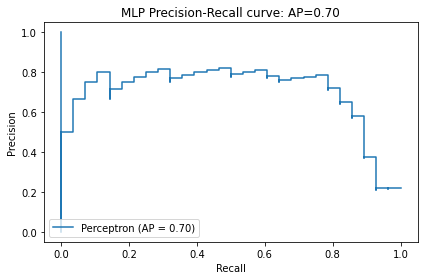

In [21]:
# Display Precision-Recall Curve
y_score = per_clf.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
disp = plot_precision_recall_curve(per_clf, X_test, y_test)
disp.ax_.set_title('MLP Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
save_fig("MLP-Precsion-Recall-Curve")

In [22]:
X_train.shape, X_test.shape

((770, 270000), (193, 270000))

### Sequential Neural Network


In [26]:
# Reshape input to (,300,300), triple the size of y to match X
# Add a validation set (X_test/y_test)
X_train = X_train.reshape(2310,300,300)
X_test = X_test.reshape(579,300,300)

y_test_double = np.append(y_test, y_test)
y_test = np.append(y_test_double, y_test)

y_train_double = np.append(y_train, y_train)
y_train = np.append(y_train_double, y_train)

y_train = y_train.astype(int)
#y_valid = y_valid.astype(int)

#X_valid = X_test
#y_valid = y_test

print ('Train: X, y ',X_train.shape,X_train.dtype, y_train.shape,y_train.dtype,'\nTest: X, y',X_test.shape, X_test.dtype, y_test.shape, y_test.dtype)

Train: X, y  (2310, 300, 300) uint8 (20790,) int64 
Test: X, y (579, 300, 300) uint8 (5211,) float64


In [0]:
print ('Train: X, y ',X_train.shape,X_train.dtype, y_train.shape,y_train.dtype,'\nValid: X, y',X_valid.shape, X_valid.dtype, y_valid.shape,y_valid.dtype,
       '\nTest: X, y',X_test.shape, X_test.dtype, y_test.shape, y_test.dtype)

Train: X, y  (2310, 300, 300) uint8 (2310,) int64 
Valid: X, y (579, 300, 300) uint8 (579,) float64 
Test: X, y (579, 300, 300) uint8 (579,) float64


In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[300, 300]))
model.add(keras.layers.Dense(600, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(3, activation="sigmoid" ))

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("ANN_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

mse_test = model.evaluate(X_test, y_test)

Epoch 1/50
73/73 [==============================] - 16s 217ms/step - loss: 3.2050 - accuracy: 0.8442 - val_loss: 3.7831 - val_accuracy: 0.8083
Epoch 2/50
73/73 [==============================] - 15s 203ms/step - loss: 3.2048 - accuracy: 0.8442 - val_loss: 3.7831 - val_accuracy: 0.8083
Epoch 3/50
73/73 [==============================] - 14s 198ms/step - loss: 3.2048 - accuracy: 0.8442 - val_loss: 3.7831 - val_accuracy: 0.8083
Epoch 4/50
73/73 [==============================] - 14s 196ms/step - loss: 3.2048 - accuracy: 0.8442 - val_loss: 3.7831 - val_accuracy: 0.8083
Epoch 5/50
73/73 [==============================] - 14s 195ms/step - loss: 3.2048 - accuracy: 0.8442 - val_loss: 3.7831 - val_accuracy: 0.8083
Epoch 6/50
73/73 [==============================] - 14s 196ms/step - loss: 3.2048 - accuracy: 0.8442 - val_loss: 3.7831 - val_accuracy: 0.8083
Epoch 7/50
73/73 [==============================] - 14s 197ms/step - loss: 3.2048 - accuracy: 0.8442 - val_loss: 3.7831 - val_accuracy: 0.8083

In [0]:
model.save("ANN_model.h5")
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 90000)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 600)               54000600  
_________________________________________________________________
dense_19 (Dense)             (None, 200)               120200    
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 603       
Total params: 54,121,403
Trainable params: 54,121,403
Non-trainable params: 0
_________________________________________________________________


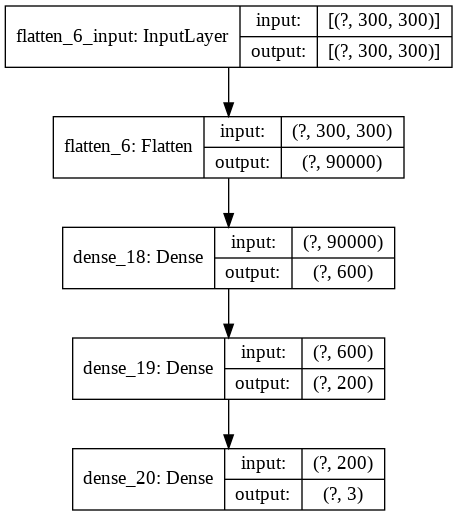

In [0]:
keras.utils.plot_model(model, "image_model.png", show_shapes=True)

In [0]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 2s 79ms/step - loss: 3.7831 - accuracy: 0.8083


[3.783144950866699, 0.8082901835441589]

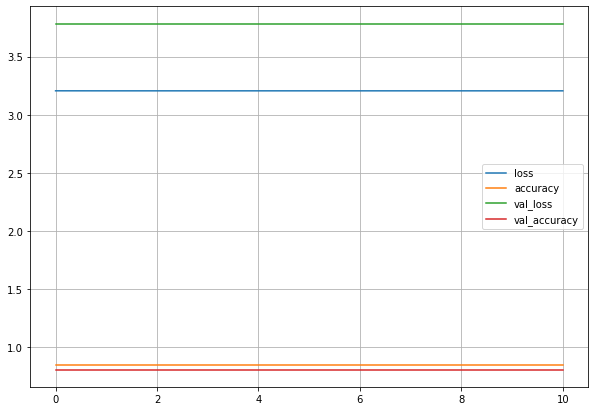

Saving figure Seq-NN-50


<Figure size 432x288 with 0 Axes>

In [0]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.show()
save_fig("Seq-NN-50")

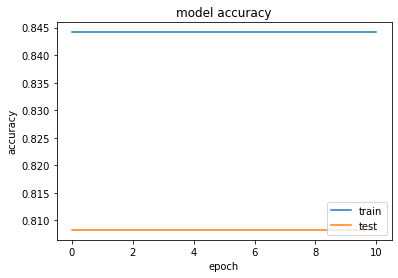

Saving figure Seq-NN-Acc-50


<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
save_fig("Seq-NN-Acc-50")

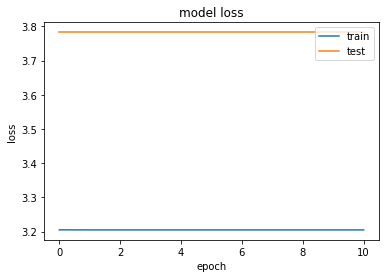

Saving figure Seq-NN-Loss-50


<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
save_fig("Seq-NN-Loss-50")

### Extract images from Instagram

In [0]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs
import time
import re
from urllib.request import urlopen
import json
from pandas.io.json import json_normalize
import pandas as pd, numpy as np

In [0]:
hashtag='sports'
browser = webdriver.Chrome('/Users/pranayraqo/Downloads/chromedriver 2')
browser.get('https://www.instagram.com/explore/tags/'+hashtag)
Pagelength = browser.execute_script("window.scrollTo(0, document.body.scrollHeight/5.0);")

In [0]:
#Extract links from hashtag page
links=[]
source = browser.page_source
data=bs(source, 'html.parser')
body = data.find('body')
script = body.find('script', text=lambda t: t.startswith('window._sharedData'))
page_json = script.text.split(' = ', 1)[1].rstrip(';')
data = json.loads(page_json)
for link in data['entry_data']['TagPage'][0]['graphql']['hashtag']['edge_hashtag_to_media']['edges']:
    links.append('https://www.instagram.com'+'/p/'+link['node']['shortcode']+'/')

In [0]:
link.to_csv(r'/Users/pranayrao/Downloads/insta_images/images.csv', index = True)

In [0]:
import pandas as pd 
import urllib.request 

def url_to_jpg(i,url,file_path):

    filename = 'image-{}'.format(i)
    fullpath = '{}{}'.format(file_path,filename)
    urllib.request.urlretrieve(url,fullpath)

    print('{} saved.'.format(filename))
    return None

file_name = 'insta_images.csv'
file_path = '/Users/pranayrao/Downloads/'

urls = pd.read_csv(file_name)

for i,url in enumerate(urls.values):
    url_to_jpg(i,url[0],file_path)

In [0]:
import pandas as pd 
import urllib.request 

def url_to_jpg(i,url,file_path):

    filename = 'image-{}'.format(i)
    fullpath = '{}{}'.format(file_path,filename)
    urllib.request.urlretrieve(url,fullpath)

    print('{} saved.'.format(filename))
    return None

file_name = 'image_tt.csv'
file_path = '/Users/pranayrao/Downloads/'

urls = pd.read_csv(file_name)

for i,url in enumerate(urls.values):
    url_to_jpg(i,url[0],file_path)

## Convolution Neural Network

In [0]:
import keras
import numpy as np
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import cv2
from matplotlib import pyplot as plt

In [0]:
#Predict a single image
def process_image(img, desired_size = 128):
    height,width,ch = img.shape
    ratio = desired_size/height
    width = int(width*ratio) if (width*ratio)<300 else 300
    height =  int(desired_size)
    dimensions = (width,height)
    image = cv2.resize(img,dimensions,interpolation=cv2.INTER_AREA)    
    # Pad bottom with zeros to desired size otherwise crop to desired size
    delta_w = (desired_size - width) if (desired_size - width) > 0 else 0
    left, right = 0, delta_w
    top, bottom = 0, 0
    color = [0, 0, 0]
    image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    dimensions = (desired_size, desired_size)
    image = cv2.resize(img,dimensions,interpolation=cv2.INTER_AREA)
    return image

#Display an RGB image in the proper size
def show_image(file,size):
    img = cv2.imread(file)
    image = process_image(img,size)
    #CV2 reads an image in BGR format. We need to convert it to RGB
    b,g,r = cv2.split(image)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
    return

#Show a list of keys 
def getList(dict): 
    return dict.keys()

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    directory="./train/",
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=6,
    class_mode="categorical",
    shuffle=True,
    seed=4
)

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(
    directory= "./valid/",
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=2,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

In [0]:
model = Sequential()

model.add(Conv2D(32, (4, 4), padding='same', input_shape=(300,300,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.35))

model.add(Conv2D(64, (4, 4), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.35))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.35))

model.add(Dense(7))
model.add(Activation('softmax'))

model.summary()

# initiate adam optimizer
opt = keras.optimizers.adam(lr=0.0001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=25,
        epochs=50,
        validation_data=valid_generator,
        validation_steps=4)

In [0]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.title('Model Accuracy/Loss')
plt.xlabel('epoch')
plt.gca().set_ylim(0, 1.1)
plt.show()
save_fig("CNN-50-25")

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
save_fig("CNN-Loss-50-25")

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
save_fig("CNN-Acc-50-25")

In [0]:
file = []
file = ["/30B1D5CF00000578-3422358-image-a-31_1454067469539.jpg","/117722373-male-senior-badminton-single-player-hand-holds-white-shuttle-cock-ready-to-serve-forehand-with-racke.jpg",
        "/13060572.jpeg", "/1498126455_957230_1498161853_noticia_normal.jpg",
        "/images39.jpg", "/11082017_uwvolleyball_213726-780x520.jpg",
        "/Men+Water+Polo+15th+FINA+World+Championships+osztgQ5Tirzx.jpg"]

label_map = (train_generator.class_indices)
label_list = getList(label_map)


In [0]:
indx = 0
for label_loop in label_list:
    dir_img =  './valid/' + label_loop + file[indx]
    img = cv2.imread(dir_img)
    image = process_image(img,300)
    
    #CV2 reads an image in BGR format. We need to convert it to RGB
    b,g,r = cv2.split(image)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    img_rank4 = np.expand_dims(rgb_img/255, axis=0)
    model.predict_classes(img_rank4)
    y_pred = list(label_map.keys())[model.predict_classes(img_rank4)[0]]
    print(indx,'Label: ' ,label_loop, '\t\tPrediction: ', y_pred)
    indx += 1
    

### Predicted correctly 6/7 validation images

In [0]:
# Build a list of files in the test directory
directory = './test/'
test_files=[];
for path, dirs, files in os.walk(directory):
    for file in files:
        test_files.append(file)


In [0]:
file_test_length = len(test_files)
indx = 0
#Read file, process file, arrange in RGB format, then predict based on CNN model
for loop in range(file_test_length):
    img = cv2.imread(directory+test_files[loop])
    image = process_image(img,300)
    #CV2 reads an image in BGR format. We need to convert it to RGB
    b,g,r = cv2.split(image)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    img_rank4 = np.expand_dims(rgb_img/255, axis=0)
    model.predict_classes(img_rank4)
    y_pred = list(label_map.keys())[model.predict_classes(img_rank4)[0]]
    print(loop,'File: ' ,test_files[loop], '\t\tPrediction: ', y_pred)
    indx += 1

### Predicted correctly 27/28 test images. 

In [0]:
show_image(directory+test_files[8],300)

## Saving the model

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/Project1/Model-50-25.h5')